# Exploratory Analysis

## Questions

1. How are adult and infant mortality rates differing in developing and developed country?
2. What is the impact of immunization on life expectancy?
3. Do densely populated countries tend to have lower life expectancy? 
4. Do countries with higher GDP have higher expenditure on health, and how does it impact life expectancy? 


### Question 1 Analysis

#### How are adult and infant mortality rates differing in developing and developed country?

First, I want to subset the countries into two different datasets, developing and developed. 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("Life Expectancy Data.csv")
var_names = df.columns


In [2]:
#cleaning data
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life Expectancy","Adult Mortality":"Adult Mortality",
                   "infant deaths":"Infant Mortality","percentage expenditure":"Health Exp/GDP","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under Five Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS","GDP":"GDP/capita"," thinness  1-19 years":"Thinness 1-19 years"," thinness 5-9 years":"Thinness 5-9 years","Income composition of resources":"Income Comp Of Resources",
                   "Total expenditure":"Health Exp/Gov Exp"},inplace=True)


In [3]:
#subset the data sets into developing and developed
developing = df[df["Status"]=="Developing"]
developed = df[df["Status"]=="Developed"]

developing = developing[developing["Infant Mortality"] <= 1000]
df=df.replace(0, np.nan)

In [4]:



dev_adult = developed["Adult Mortality"]
dev_adult = dev_adult.dropna()
dev_infan = developed["Infant Mortality"]
dev_infan = dev_infan.dropna()
deving_adult = developing["Adult Mortality"]
deving_adult = deving_adult.dropna()
deving_infan = developing["Infant Mortality"]
deving_infan = deving_infan.dropna()


Text(0.5, 1.0, 'Adult and Infant Mortality Rates in Developing and Developed Countries')

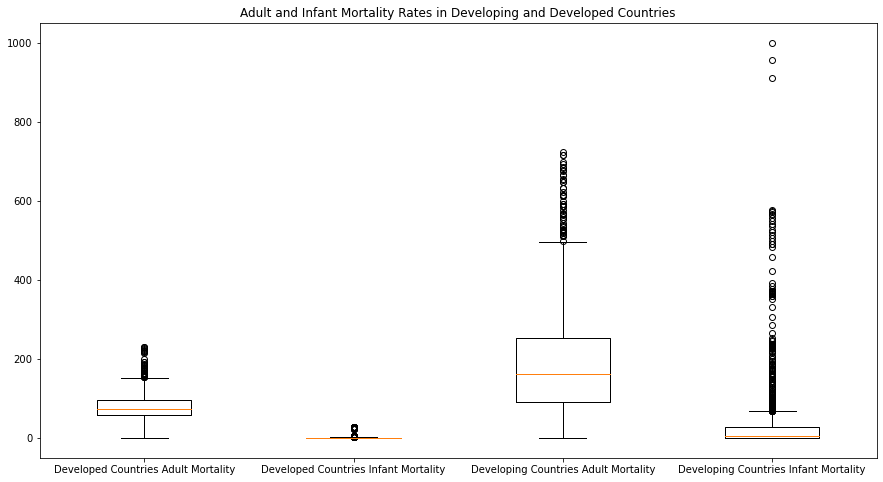

In [8]:
mortality_dat = [dev_adult, dev_infan, deving_adult, deving_infan];
fig, ax = plt.subplots(figsize = (15,8));
ax.boxplot(mortality_dat);
plt.xticks([1,2,3,4], ["Developed Countries Adult Mortality", "Developed Countries Infant Mortality", "Developing Countries Adult Mortality", "Developing Countries Infant Mortality"])
plt.title("Adult and Infant Mortality Rates in Developing and Developed Countries")

Worries
- na values
- 500 developed and 1400 developing, the n is very different.
    - should I take a random sample and do a boxplot on there?
    - should i include deaths under 5?

### Question 2 Analysis

#### What is the impact of immunization on life expectancy?

Which diseases are they getting immunized against?
- Diptheria
- Polio
- Hepatitis B

What am I going to do about measles?
Should I seperate these into developed and developing?

Text(0, 0.5, 'Life Expectancy')

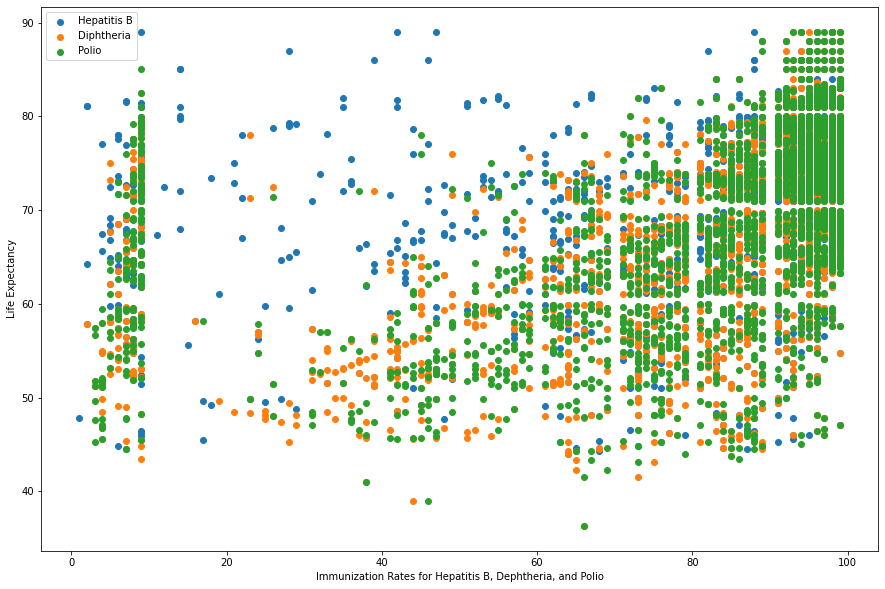

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(df["HepatitisB"], df["Life Expectancy"], label = "Hepatitis B");
plt.scatter(df["Diphtheria"], df["Life Expectancy"], label = "Diphtheria");
plt.scatter(df["Polio"], df["Life Expectancy"], label = "Polio");
plt.legend(loc='upper left', prop={'size': 10});
plt.xlabel("Immunization Rates for Hepatitis B, Dephtheria, and Polio")
plt.ylabel("Life Expectancy")

### Question 3 Analysis

#### Do densely populated countries tend to have lower life expectancy? 
This question is impossible to do since there is no population density variable only the raw population. There isnt a size varaible either so that I can find the population density manually. Thus, I am changing my question. 

#### New Question - What is the relationship between Income Composition of Resources and Life Expectancy?

Income composition of resources measures how productively resources are used in a country. Human Development Index is expressed in terms of ICOR.  

Text(0.5, 1.0, 'Income Composition of Resources and Life Expectancy')

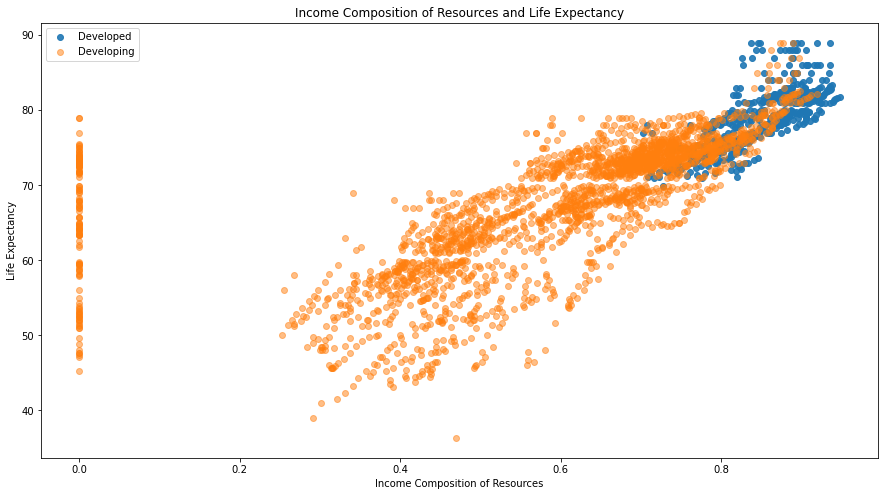

In [7]:
plt.figure(figsize =(15,8))
plt.scatter(developed["Income Comp Of Resources"], developed["Life Expectancy"],alpha=0.9, label = "Developed");
plt.scatter(developing["Income Comp Of Resources"], developing["Life Expectancy"],alpha=0.5, label = "Developing");


plt.legend(loc='upper left', prop={'size': 10});
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy")
plt.title("Income Composition of Resources and Life Expectancy")






Should I get rid of all the 0 values for ICOR?

### Question 4 Analysis

#### Do countries with higher GDP per capita have higher expenditure on health, and how does it impact life expectancy? 



In [10]:
dev = developed["GDP/capita"].describe()
print(dev)

count       448.000000
mean      22053.386446
std       22870.827763
min          12.277330
25%        3875.740910
50%       13560.723860
75%       36760.425993
max      119172.741800
Name: GDP/capita, dtype: float64


In [11]:
deving = developing["GDP/capita"].describe()
print(deving)

count     2042.000000
mean      4286.556053
std       8772.467789
min          1.681350
25%        382.749830
50%       1246.021671
75%       4147.739877
max      88564.822980
Name: GDP/capita, dtype: float64


<AxesSubplot:>

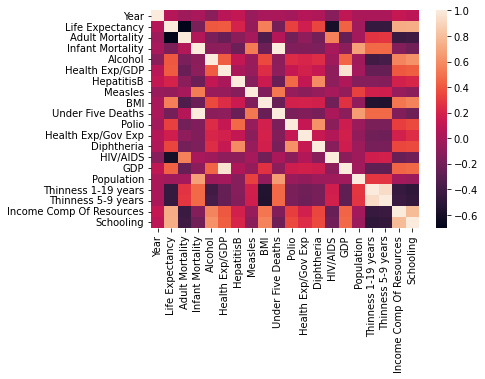

In [10]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [18]:
corr = df["Health Exp/GDP"].corr(df["GDP/capita"])
print(corr)

0.9592988569672167


In [20]:
corr1 = df["Health Exp/Gov Exp"].corr(df["GDP/capita"])
print(corr1)

0.1803734700778568


Text(0, 0.5, 'Health Expenditure as a percentage of GDP per Capita')

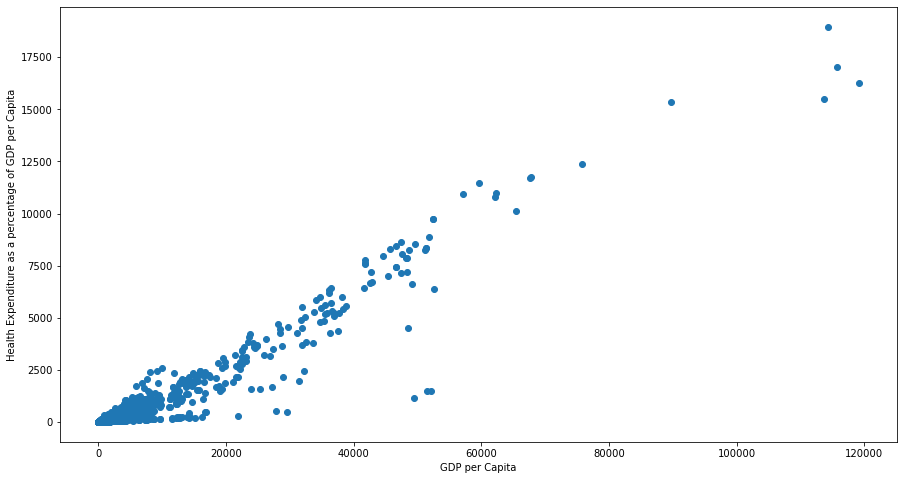

In [23]:
plt.figure(figsize =(15,8))
plt.scatter(df["GDP/capita"], df["Health Exp/GDP"]);

plt.xlabel("GDP per Capita")
plt.ylabel("Health Expenditure as a percentage of GDP per Capita")




## ####USE THIS GRAPH

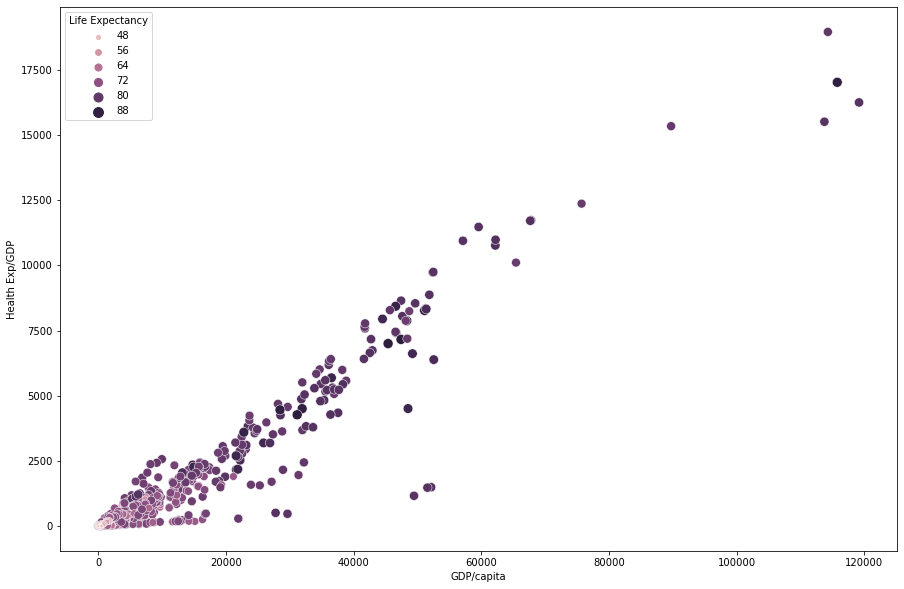

Text(0, 0.5, 'Health Expenditure as a percentage of GDP per Capita')

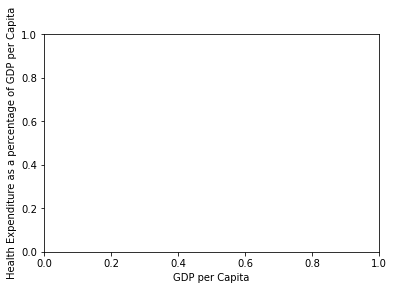

In [46]:

import seaborn as sns

plt.figure(figsize =(15,10))
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="GDP/capita", y = "Health Exp/GDP",size="Life Expectancy", hue= "Life Expectancy",sizes=(10,100))

# show the graph
plt.show()
plt.xlabel("GDP per Capita")
plt.ylabel("Health Expenditure as a percentage of GDP per Capita")

<AxesSubplot:xlabel='GDP/capita', ylabel='Life Expectancy'>

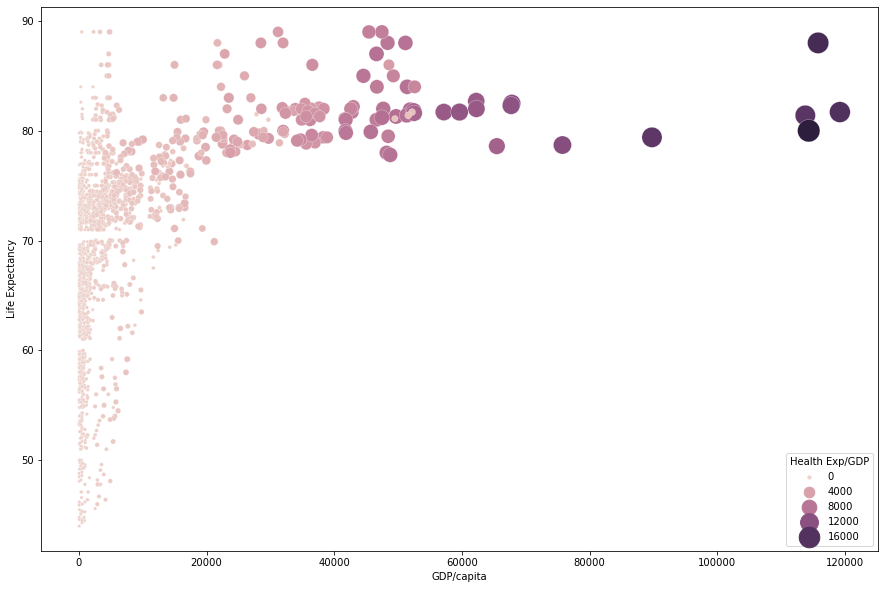

In [44]:
plt.figure(figsize =(15,10))
sns.scatterplot(data=df, x="GDP/capita", y = "Life Expectancy",size="Health Exp/GDP", hue= "Health Exp/GDP",sizes=(10,500))



<AxesSubplot:xlabel='Health Exp/GDP', ylabel='Life Expectancy'>

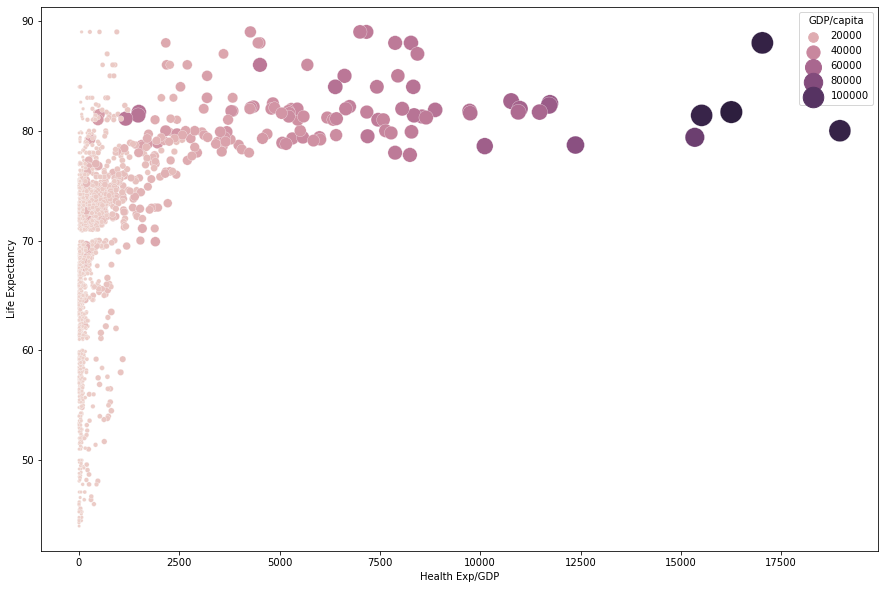

In [45]:
plt.figure(figsize =(15,10))
sns.scatterplot(data=df, x="Health Exp/GDP", y = "Life Expectancy",size="GDP/capita", hue= "GDP/capita",sizes=(10,500))

